In [1]:
import pandas as pd
import numpy as np
source_path = '../data/raw/cryptocurrencypricehistory/'
csv_files = ['bitcoin_cash_price.csv',
             'bitcoin_price.csv',
             'bitconnect_price.csv',
             'dash_price.csv',
             'ethereum_classic_price.csv',
             'ethereum_price.csv',
             'iota_price.csv',
             'litecoin_price.csv',
             'monero_price.csv',
             'nem_price.csv',
             'neo_price.csv',
             'numeraire_price.csv',
             'omisego_price.csv',
             'qtum_price.csv',
             'ripple_price.csv',
             'stratis_price.csv',
             'waves_price.csv'
             ]

Select file do you like view setting file_index var.
Fit limit to viewed data if you want on nrows var.
Next run all notebook.

In [2]:
file_index = 4; # File 0 - 16 ok array of files
nrows = None # limit of rows to make preview (None for all data)

Loading data.
We need read Market Cap column as string because pandas can't manage NA converting to int.

In [3]:
csv_working_file = csv_files[16];
f = source_path + csv_working_file;
data = pd.read_csv(f,
            nrows=nrows,
            index_col=0,
            dtype={'Volume':'int','Market Cap':'string'},
            thousands=',',
            na_values='-',
            parse_dates=True)


We can check that data has not nulls values

In [4]:
data.isnull().sum()#%% md

Open           0
High           0
Low            0
Close          0
Volume         0
Market Cap    19
dtype: int64

We can view statistical data

In [5]:
data.describe()



,Open,High,Low,Close,Volume
count,461.000000,461.000000,461.000000,461.000000,4.610000e+02
mean,1.230215,1.325607,1.139349,1.236654,1.029869e+06
std,1.736739,1.855163,1.612736,1.743821,1.865055e+06
min,0.127527,0.151516,0.122684,0.127242,4.912000e+03
25%,0.209567,0.218997,0.195051,0.209126,5.223200e+04
50%,0.263923,0.282579,0.245773,0.262370,1.543750e+05
75%,1.330000,1.600000,1.190000,1.370000,1.225380e+06
max,6.340000,7.010000,5.740000,6.340000,1.012410e+07


Converting 'Market cap to Int64' to work with numeric types. If NA we set to 0.

In [6]:
data['Market Cap'] = data['Market Cap'].apply(lambda x :  int(x.replace(',','')) if isinstance(x, str) else 0 )

Plot of value of currencies.
We can view the High is always on top.
We can view the Low is always on bottom.

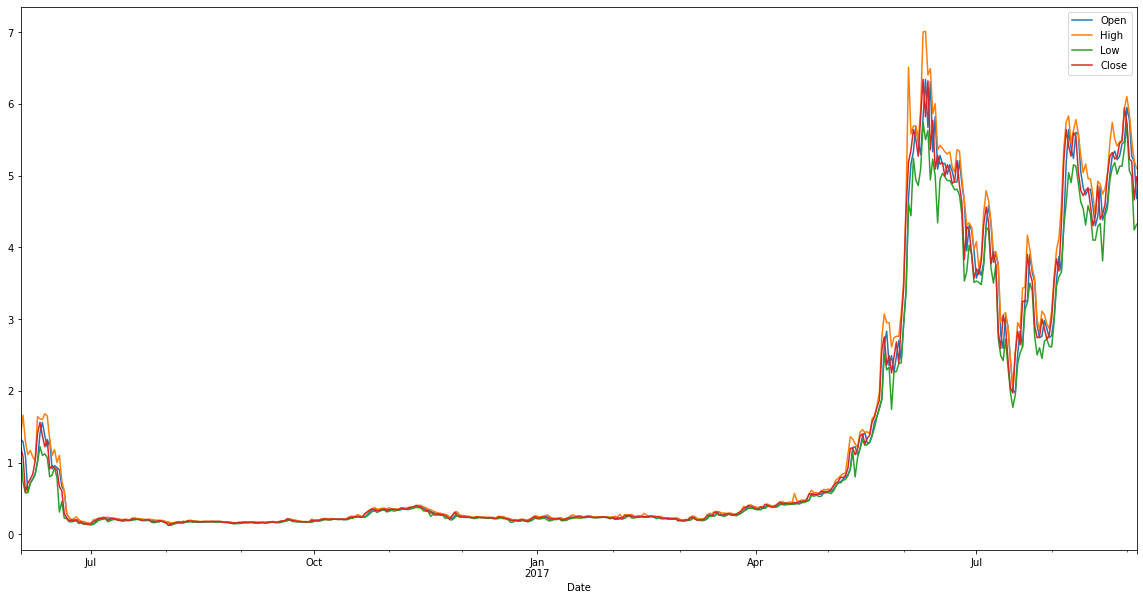

In [7]:
data.plot.line(y = ['Open','High','Low','Close'],  figsize=(20,10))

We check the correct data. And the conclusion is that there are not inconsistencies with the values. High colum always have higher than the other columns, low column always has lower values than the other columns and open and close they are in between.

In [35]:
data['CheckValues'] = np.where(((data.High > data.Low) & (data.High >= data.Close)& (data.High >= data.Open)& (data.Low <= data.Close)& (data.Low <= data.Open)), 'True', 'False')
data['CheckValues'].value_counts()

True    461
Name: CheckValues, dtype: int64

Plot of volume and capital.

The plot has concordancy with below plot that has high Market cap when are the high prices.

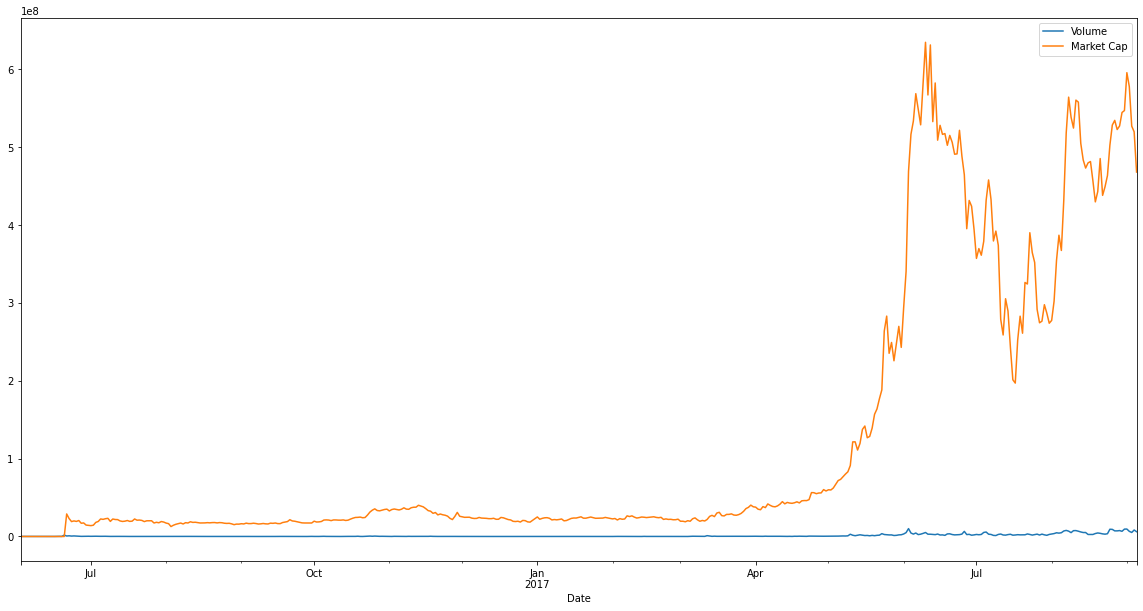

In [8]:
data.plot.line(y = ['Volume','Market Cap'],  figsize=(20,10))


